## Recherche par liste de régions d'injection

In [ ]:
# exemple sur les injections à l'isocortex
import pandas as pd
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

mcc = MouseConnectivityCache()

structure_tree = mcc.get_structure_tree()
isocortex_id = structure_tree.get_structures_by_name(['Isocortex'])[0]['id']                             
injection_regions_ids = [isocortex_id]

experiments = mcc.get_experiments(dataframe=True, injection_structure_ids=injection_regions_ids)
print("%d total experiments" % len(experiments))

experiments

## Recherche par proximité d'une région d'injection

In [214]:
# experiment_injection_coordinate_search (regions d'injections)

## Recherche par zone à forte densité de projection

In [215]:
# experiment_spatial_search (densité)

## Recherche par coordonnées d'injection

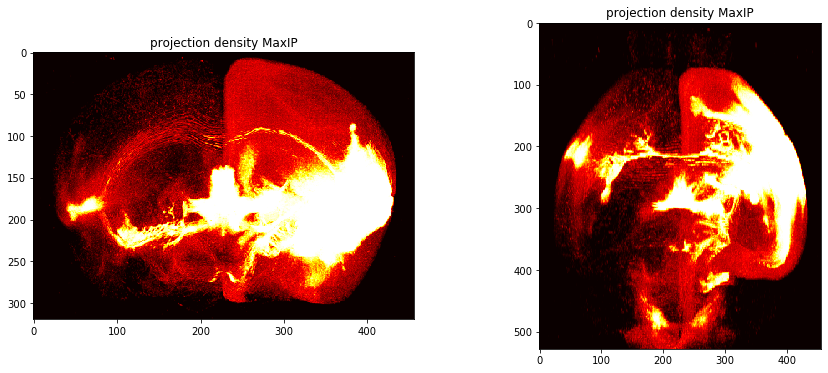

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

def load_allen_experiments():
    # open up a list of all of the experiments
    return MouseConnectivityCache().get_experiments(dataframe=True)

def get_id_from_injection_coord(injection_coord):#(x,y,z):
    #injection_coord = [x, y, z]
    all_experiments = load_allen_experiments()
    experiment_id = all_experiments.index[all_experiments['injection-coordinates'].map(set(injection_coord).issubset)].tolist() 
    return experiment_id[0]

def get_projection_density(experiment_id):
    pd, pd_info = mcc.get_projection_density(experiment_id)
    # compute the maximum intensity projection (along the anterior-posterior axis) of the projection data
    pd_mip_x = pd.max(axis=0)
    pd_mip_y = pd.max(axis=1)
    f, pr_axes = plt.subplots(1, 2, figsize=(15, 6))
    pr_axes[0].imshow(pd_mip_x, cmap='hot', aspect='equal')
    pr_axes[0].set_title("projection density MaxIP")
    pr_axes[1].imshow(pd_mip_y, cmap='hot', aspect='equal')
    pr_axes[1].set_title("projection density MaxIP")
    plt.show()
    return

load_allen_experiments()
experiment_id = get_id_from_injection_coord([5520, 4470, 10080])
get_projection_density(experiment_id)